# Alternus Vera 

Course code : **CMPE-257** 
    
Group name : **Codebusters**
    

### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    
    Column 1: the ID of the statement ([ID].json).
    
    Column 2: the label.
    
    Column 3: the statement.
    
    Column 4: the subject(s).
    
    Column 5: the speaker.
    
    Column 6: the speaker's job title.
    
    Column 7: the state info.
    
    Column 8: the party affiliation.
    
    Column 9-13: the total credit history count, including the current
    statement.
    
        9: barely true counts.
        
        10: false counts.
        
        11: half true counts.
        
        12: mostly true counts.
        
        13: pants on fire counts.
        
    Column 14: the context (venue / location of the speech or statement).



## Business Problem

Fake news problem is too important to ignore especially after recent election of Donald Trump. These news are like malignant tumor that causes moral treats. It is nothing but a nassault on truth. Being impartial about the real news are same as that of a deliberate lies.

The main purpose of this project is to identify essential features that can be trusted to predict if a news is fake or not. These features are realted to the news content. Our key classification is to predict if a news is fake or not based on these features. In addition, we are also intended to learn various deep learning and neural networking techniques and compare their performances.


We initially as a team performend literature survey on list of features that has so far played major role in popularising a fake news. Each member of the team took one major feature and performed distillation process. We vectorized and came up with embedding vectors. Computed polynomial equation and classified the news articles based on all the below features. 


### Process Steps: 
- Load the Data
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
    - Sentiment Analysis  
    - LDA Topic Modelling
    - word2Vec Word Embedding 
    - TF-IDF Vectorization
    - Doc2Vec using individual feature
- Vector Classification Modeling 
- Ranking and Importance
- Compute Polynomial Equation **[(0.6 *Clickbait) + (0.1 *Sensationalism) + (0.2 *Political Affiliation Feature) + (0.1 *Context)]**
- Perform Classification Prediction 


### Feature Selection
**Top Features Selected based on research articles**

1. Political Affliation
2. Sensationalism
3. Clickbait 
4. Context Modeling   
5. Spam  

*Other simple features as a part of distillation:*
6. Sentiment Analysis 
7. LDA Topic Modeling  
8. Ranking

### Contributions:


|Features |  Member |
|-----|-----|
| Political Affliation              |  Anushri| 
| Sensationalism/Psychology Utility |  Harini |  
| Clickbait                         |  Ravi   | 
| Context/Venue                     |  Sunder | 
| Spam                              |  All | 

As a team, we decided on the importance of the factors presented in this paper. We brainstormed on the general pre-processing techniques we did want to use. We also had common visualization methods and similar techniques for evaluating the classification model accuracy. Each of us enriched the dataset with individual features and persisted it in a csv file. Each feature vector is persisted on csv (which is distilled with LDA, sentiment scores). We also came up with a polynomial equation based on the factors and the accuracy scores we received by classification. The polynomial equation is then used to build a model for fake news classification. The **polynomial equation that we have used is (0.6*Clickbait) + (0.1 *Sensationalism) + (0.2*Political Affiliation Feature) + (0.1*Context)**. The final model that we built is a variation of the stack ensemble technique. Stacked generalization is an ensemble method where the models are combined using another machine learning algorithm. The basic idea is to train machine learning algorithms with training dataset and then generate a new dataset with these models. Then this new dataset is used as input for the combined machine learning algorithm. The combined model is then used to predict the fakeness in the corpus. We as a team were able to achieve an accuracy of 57% using the various supervised learning techniques specified in this paper.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
#Method to load data
def load_data(file_name):
    #load data
    data = pd.read_csv(file_name, sep=',',error_bad_lines=False)
    return data

#### Political Affiliation ( By: Anushri Srinath Aithal )

Recent studies have proven all media have some sort unofficial political affiliation these days: conservative, liberal, libertarian, Republican, Democrat, far right-wing, far left-wing — the list goes on. Political bias/affliation towards certain political parties, political leaders can influence fake news origin.

**Feature Engineering: Political Affiliation Vector**

1. Data Preprocessing: Stop words, Spell check, Punctuation, Stemming
2. Data Visualization: Word Length Distributions, Fake News Label Distribution, Word Cloud Visualization, t-SNE visualization, Political Affiliation Label Visualization
2. Custom dictionary based on word frequency
3. TF-IDF and Classification on Political Affiliaition Labels
4. Doc2Vec and Classification on Political Affiliation Labels
5. Distillation by performing Sentiment Analysis
6. Distillation by performing LDA. Visualization of topic distribution.
6. Distillation by performing Ranking and Visualization.
7. Classification of Fake News based on the Political Affiliation vector.

I was able to achieve an accuracy of **56%** which is evidently more(without distillation **37%**) than what I have been able to achieve without distillation process.

In [3]:
#Load Political Affiliation Feature Vector
pa_train_vector = load_data('political_affiliation_feature_train.csv')
pa_test_vector = load_data('political_affiliation_feature_test.csv')

In [4]:
#Load Context Feature vector
context_train_vector = load_data('train_contextfeature.csv')
context_test_vector = load_data('test_contextfeature.csv')

In [5]:
#Load Clickbait Feature vector
clickbait_train_vector = load_data('train_clickbaitfeature.csv')
clickbait_test_vector = load_data('test_clickbaitfeature.csv')

## Sensationalism Feature 

>  Words aren’t just strings of alphabets sewn together with ink. Words are cues. Words are triggers. Words when used correctly can transform an “eh whatever” into “wow that’s it!”.

> Highly emotional words are capable capable of transforming an absolute no into almost yes and a “perhaps” into “for sure”!

**Harini Balakrishnan** performed distillation process, vectorized the news article based on sensational classification and predicted the model with 56.35% accuracy and 72% f1-score. 


#### Load the sensational feature vectors from CSV file 

In [6]:
#Load Sensationalism Feature vector
sensationalism_train_vector = load_data('train_sensational_feature.csv')
sensationalism_test_vector = load_data('test_sensational_feature.csv')

In [7]:
#Fetch feature vector for each of the factors decided
def get_feature_vector(df, column_name):
    feature_vector = []
    for index,row in df.iterrows():
        vector_string = row[column_name].strip("[]")
        vector = np.array(vector_string.split(','), dtype=float)
        feature_vector.append(vector)
    return feature_vector

In [8]:
#Represent feature vectors in a polynomial equation. The polynomial equation is (0.6*Clickbait)+(0.1*Sensationalism)+(0.2*Political Affilition Feature)+(0.1*Context Feature).
#The weights are decided based on individual classification score.
def get_feature_vector_after_polynomial_equation(pa_vector, context_vector, clickbait_vector, sensation_vector):
    feature_vector = []
    for i in range(len(pa_vector)):
        vector1 = np.append(0.1*context_vector[i], 0.2*pa_vector[i])
        vector2 = np.append(0.1*sensation_vector[i], 0.6*clickbait_vector[i])
        vector = np.append(vector1, vector2)
        feature_vector.append(vector)
    return feature_vector

In [9]:
#Get Political Affiliation feature vector
political_affiliation_train_feature_vector = get_feature_vector(pa_train_vector, 'political_affiliation_vector')
political_affiliation_test_feature_vector = get_feature_vector(pa_test_vector, 'political_affiliation_vector')

In [10]:
#Get Context feature vector
context_train_feature_vector = get_feature_vector(context_train_vector, 'context_vector')
context_test_feature_vector = get_feature_vector(context_test_vector, 'context_vector')

In [11]:
#Get Clickbait feature vector
clickbait_train_feature_vector = get_feature_vector(clickbait_train_vector, 'clickbait_vector')
clickbait_test_feature_vector = get_feature_vector(clickbait_test_vector, 'clickbait_vector')

In [12]:
#Get Sensationalism feature vector
sensationalism_train_feature_vector = get_feature_vector(sensationalism_train_vector, 'sensational_vector')
sensationalism_test_feature_vector = get_feature_vector(sensationalism_test_vector, 'sensational_vector')

## Get polynomial weighted vectors for the fake news classifier

Equation: (0.6*Clickbait) + (0.1 *Sensationalism) + (0.2*Political Affiliation Feature) + (0.1*Context)

#### Prepare the train and test data for classification 

In [13]:
#Train data
X_feature_train = pd.DataFrame(get_feature_vector_after_polynomial_equation(political_affiliation_train_feature_vector, context_train_feature_vector, clickbait_train_feature_vector, sensationalism_train_feature_vector))
X_train = pd.DataFrame(X_feature_train)
y_train = pa_train_vector['encoded_label']

#Test data
X_feature_test = pd.DataFrame(get_feature_vector_after_polynomial_equation(political_affiliation_test_feature_vector, context_test_feature_vector, clickbait_test_feature_vector, sensationalism_test_feature_vector))
X_test = pd.DataFrame(X_feature_test)
y_test = pa_test_vector['encoded_label']

#### Confusion Matrix Visualization Method 

In [14]:
#Method to calculate model accuracy, precision
def estimate_score(y_test, y_pred):
    score(y_test, y_pred, average='macro')
    precision, recall, fscore, support = score(y_test, y_pred)
    
    print('accuracy: {}'.format(accuracy_score(y_test,y_pred)*100))
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

### Logistic Regression Model

accuracy: 56.9060773480663
precision: [0.64       0.56763285]
recall: [0.02893309 0.98739496]
fscore: [0.05536332 0.7208589 ]
support: [553 714]


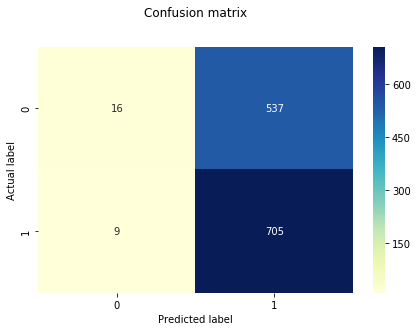

In [15]:
#perform vector classification using Logistic Regression
from sklearn.linear_model import  LogisticRegression
fake_news_classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
fake_news_classifier.fit(X_train, y_train)
y_pred = fake_news_classifier.predict(X_test)
estimate_score(y_test, y_pred)

### SVM Classifier Model

accuracy: 56.353591160220994
precision: [0.         0.56353591]
recall: [0. 1.]
fscore: [0.         0.72084806]
support: [553 714]


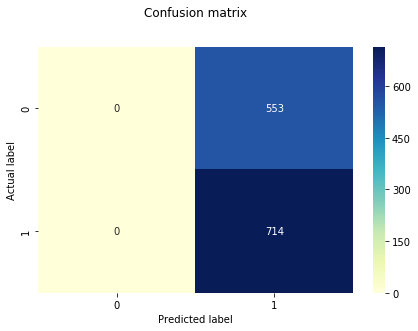

In [16]:
#perform vector classification using SVM
from sklearn.svm import SVC
fake_news_svm_classifier = SVC(kernel = 'linear', random_state = 42)
model = fake_news_svm_classifier.fit(X_train,y_train)
y_pred = model.predict(X_test)
estimate_score(y_test, y_pred)

### Random Forest Classifier Model 

accuracy: 54.38042620363063
precision: [0.4501992  0.56692913]
recall: [0.20433996 0.80672269]
fscore: [0.28109453 0.66589595]
support: [553 714]


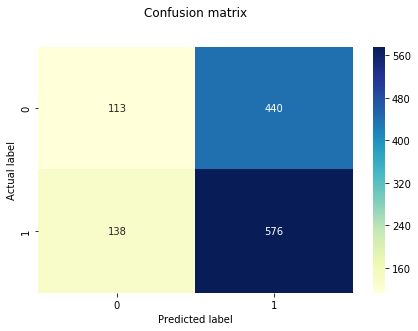

In [17]:
#perform vector classification using Random Classifier
from sklearn.ensemble import RandomForestClassifier
fake_news_rf_classifier = RandomForestClassifier(n_jobs=-1,n_estimators=200,max_depth=90)
model = fake_news_rf_classifier.fit(X_train,y_train)
y_pred = model.predict(X_test)
estimate_score(y_test, y_pred)

In [18]:
predictions = fake_news_rf_classifier.predict_proba(X_test)

### Create function to find the confidence of prediction

Original -- True - >0.30
True -- True - >0.30
Mostly-true -- 0.15 - 0.3
Half-true -- 0.0 - 0.15
Barely-true -- (-0.15) - (0.0)
False -- False  -- <(-0.15)
Pants-fire -- False -- <(-0.15)

In [30]:
def label_for_prediction_probability(prediction):
    prob_score_diff = prediction[1] - prediction[0]
    if(prob_score_diff>=0.30):
        return "original"
    elif(prob_score_diff<0.30 and prob_score_diff>=0.15):
        return "mostly-true"
    elif(prob_score_diff<0.15 and prob_score_diff>=0.0):
        return "half-true"
    elif(prob_score_diff<0.0 and prob_score_diff>=(-0.15)):
        return 'barely-true'
    else:
        return 'pants-on-fire'
        

#### Identify prediction confidence for Train data

In [31]:
for prediction in predictions:
    #print(prediction[1] - prediction[0])
    print ( label_for_prediction_probability(prediction) )

mostly-true
mostly-true
barely-true
mostly-true
mostly-true
half-true
mostly-true
mostly-true
half-true
original
half-true
half-true
barely-true
half-true
barely-true
half-true
mostly-true
mostly-true
mostly-true
barely-true
half-true
mostly-true
pants-on-fire
half-true
mostly-true
half-true
pants-on-fire
pants-on-fire
original
barely-true
half-true
half-true
barely-true
mostly-true
half-true
mostly-true
barely-true
original
original
half-true
mostly-true
original
barely-true
half-true
barely-true
original
barely-true
half-true
barely-true
half-true
half-true
mostly-true
half-true
barely-true
half-true
mostly-true
original
half-true
half-true
barely-true
barely-true
mostly-true
mostly-true
original
original
half-true
mostly-true
original
mostly-true
original
half-true
half-true
half-true
half-true
half-true
half-true
mostly-true
mostly-true
mostly-true
pants-on-fire
half-true
barely-true
mostly-true
mostly-true
mostly-true
barely-true
barely-true
mostly-true
mostly-true
mostly-true
hal